### Time Series Data

In [1]:
import yfinance as yf

In [ ]:
df = yf.download('AAPL', start = '2023-01-01', end = '2023-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.shape

(250, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,171.093881,172.391078,169.540437,170.804350,5.921703e+07
std,17.399658,17.331272,17.598674,17.596275,1.777392e+07
min,123.583092,126.301485,122.742865,124.561732,2.404830e+07
25%,160.493954,160.766223,159.095568,159.942023,4.781208e+07
50%,174.198265,175.736974,172.575156,173.969934,5.507750e+07
75%,186.060764,186.696109,183.579764,185.195728,6.574292e+07
max,196.927658,198.428641,195.824279,196.838199,1.543573e+08


In [7]:
companies = ['AAPL', 'MSFT', 'GE']
df2 = yf.download(companies, start = '2023-01-01', end = '2023-12-31')
df2.head()

[*********************100%***********************]  3 of 3 completed


Price            Close                               High             \
Ticker            AAPL         GE        MSFT        AAPL         GE   
Date                                                                   
2023-01-03  123.632523  52.341320  235.240036  129.395510  52.409071   
2023-01-04  124.907700  55.387810  224.949905  127.181268  55.387810   
2023-01-05  123.583092  56.247814  218.282867  126.301485  56.452956   
2023-01-06  128.130234  56.760670  220.855392  128.792531  57.068379   
2023-01-09  128.654129  57.336639  223.005722  131.876670  58.314999   

Price                          Low                               Open  \
Ticker            MSFT        AAPL         GE        MSFT        AAPL   
Date                                                                    
2023-01-03  241.298265  122.742865  51.454388  233.099519  128.782641   
2023-01-04  228.651602  123.642412  52.665760  221.866786  125.431607   
2023-01-05  223.427951  123.326085  54.441004  217.742828  125.668841   
2023-01-06  221.670359  123.454601  55.821758  215.376487  124.561732   
2023-01-09  227.051099  128.397123  56.776450  222.308592  128.970458   

Price                                 Volume                      
Ticker             GE        MSFT       AAPL        GE      MSFT  
Date                                                              
2023-01-03  51.768509  238.676634  112117500  10280781  25740000  
2023-01-04  53.975497  228.072293   89113600  21031104  50623400  
2023-01-05  55.151105  223.084285   80962700  16001061  39585600  
2023-01-06  56.815900  218.960362   87754700  13018044  43613600  
2023-01-09  56.808008  222.347861   70790800   9488844  27369800

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
def plot_timeseries(df, attrib, ticker_loc=1, title= 'Time Series', legend = ''):
    fig = plt.figure(figsize=(15,7))
    plt.plot(df[attrib], 'o-')
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
    plt.title(title)
    plt.gca().legend(legend)
    plt.show()

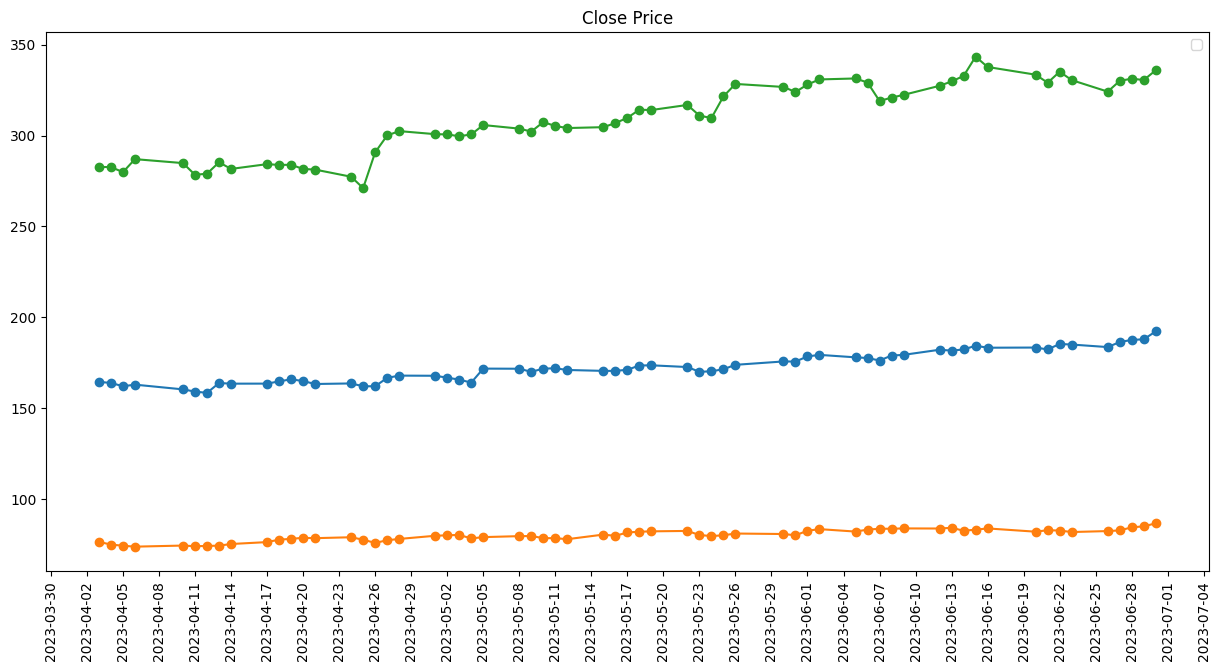

In [11]:
plot_timeseries(df2.loc['2023-04-01':'2023-06-30'], "Close", ticker_loc=3, title='Close Price')

[*********************100%***********************]  1 of 1 completed
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([18171.0, ..., 20179.0])

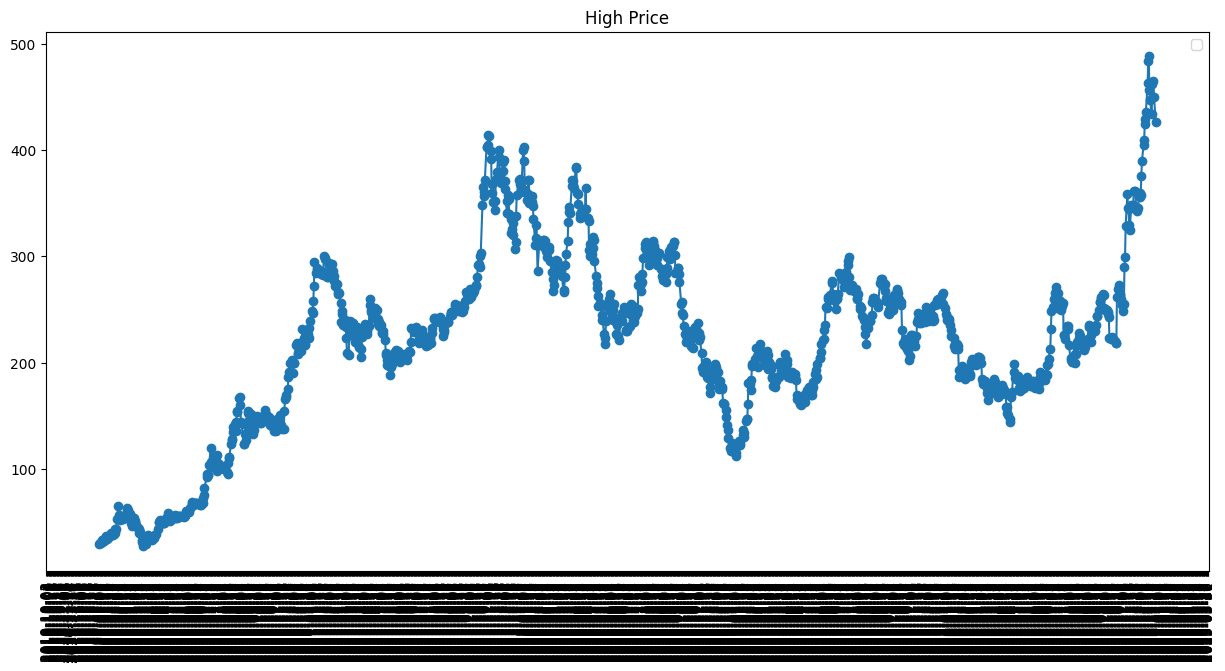

In [14]:
tsla_df = yf.download('TSLA', start = '2020-01-01', end = '2024-12-31')
plot_timeseries(tsla_df.loc['2020-01-01':'2024-12-31'], "High", title='High Price')


In [15]:
import pandas_datareader as pdr

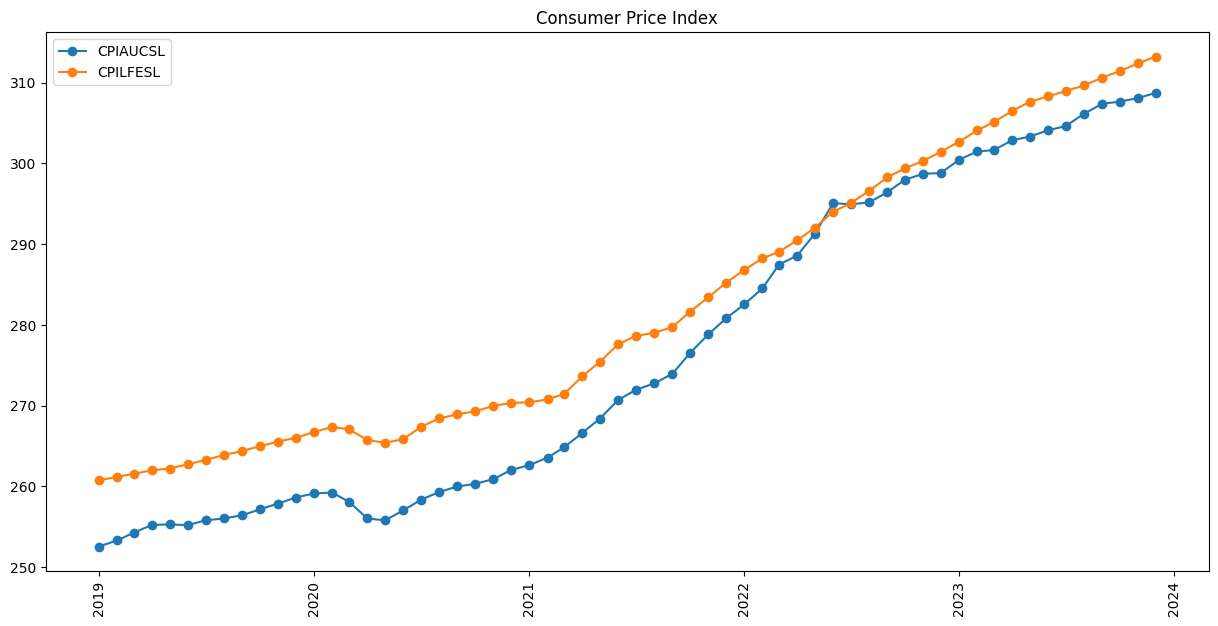

In [16]:
fred_df = pdr.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', '2010-01-01', '2023-12-31')
fig = plt.figure(figsize=(15,7))
plt.plot(fred_df.loc['2019':], 'o-')
plt.xticks(rotation=90)
plt.legend(fred_df.columns)
plt.title('Consumer Price Index')
plt.show()

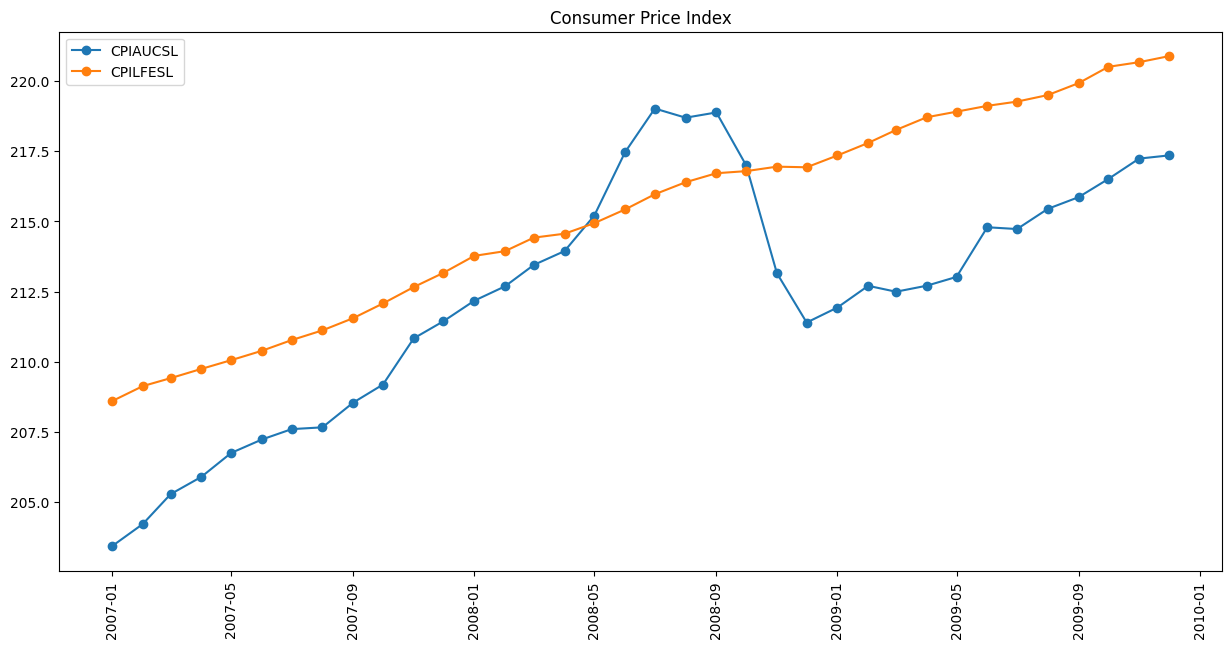

In [17]:
new_df = pdr.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', '2005-01-01', '2023-12-31')
fig = plt.figure(figsize=(15,7))
plt.plot(new_df.loc['2007':'2009'], 'o-')
plt.xticks(rotation=90)
plt.legend(new_df.columns)
plt.title('Consumer Price Index')
plt.show()

In [ ]:
population_df = wb.download(indicator = 'SP.POP.TOTL', country=)